# Import libraries

In [5]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [8]:
# Import relationship data

relationship_df = pd.read_csv('relationships_df.csv', index_col = 0)

In [11]:
relationship_df

source              target  value
0             Sarajevo  the British Empire      5
1               France  the British Empire      6
2               France  the Russian Empire      6
3    the German Empire  the Russian Empire      6
4              Austria   the German Empire      6
..                 ...                 ...    ...
289             Egorov    the Soviet Union      5
290   THE SOVIET UNION    The Soviet State      6
291            Alfredo            Kellaway      1
292            Alfredo                Lean      1
293              India           Singapore      5

[294 rows x 3 columns]

In [16]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

# Graph visualization - Networkx

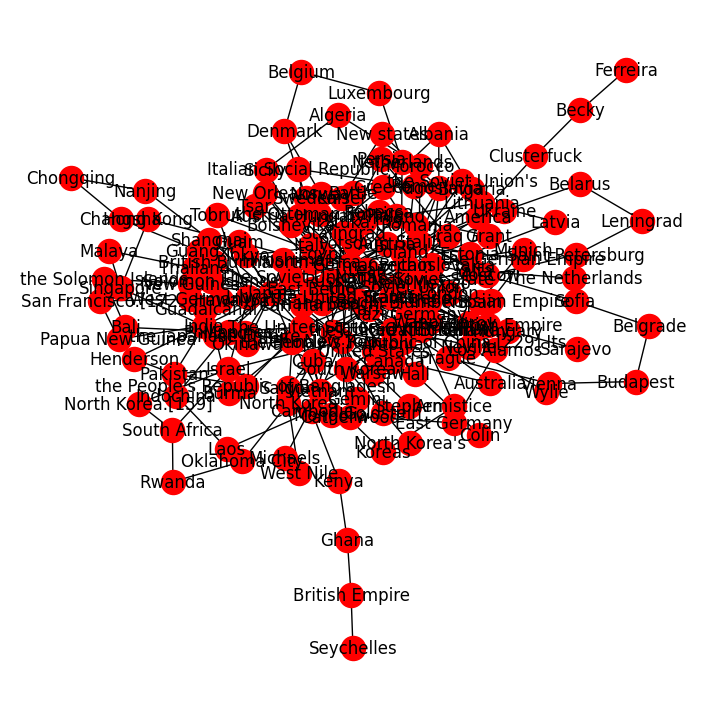

In [21]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [29]:
h.savefig('networkx_plt_20th_century.png')

# Graph visualization - Pyvis

In [39]:
# Define net object

net = Network()
net = Network(notebook = True,width="700px", height="600px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [37]:
net.save_graph("20th_century_network.html")

# Community detection - Leiden algorithm

In [44]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap', 'bayanpy', 'graph_tool'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [47]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [50]:
new_com = coms.to_node_community_map()

In [53]:
new_com

defaultdict(list,
            {'North Africa': [0],
             'Pearl Harbor': [0],
             'Hawaii': [0],
             'Japan': [0],
             'China': [0],
             'Manchuria': [0],
             'Thailand': [0],
             'Malaya': [0],
             'Singapore': [0],
             'Hong Kong': [0],
             'Guam': [0],
             'British Burma': [0],
             'New Guinea': [0],
             'the Solomon Islands': [0],
             'Bali': [0],
             'Philippines': [0],
             'Solomon Islands': [0],
             'Guadalcanal': [0],
             'India': [0],
             'the Japanese Empire': [0],
             'Burma': [0],
             'Okinawa': [0],
             'The United States': [0],
             'The Soviet Union': [0],
             'Pakistan': [0],
             'West Germany': [0],
             'San Francisco.[172': [0],
             'Papua New Guinea': [0],
             "the People's Republic of Bangladesh": [0],
             'Hend

In [56]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [59]:
dict_com

{'North Africa': 0,
 'Pearl Harbor': 0,
 'Hawaii': 0,
 'Japan': 0,
 'China': 0,
 'Manchuria': 0,
 'Thailand': 0,
 'Malaya': 0,
 'Singapore': 0,
 'Hong Kong': 0,
 'Guam': 0,
 'British Burma': 0,
 'New Guinea': 0,
 'the Solomon Islands': 0,
 'Bali': 0,
 'Philippines': 0,
 'Solomon Islands': 0,
 'Guadalcanal': 0,
 'India': 0,
 'the Japanese Empire': 0,
 'Burma': 0,
 'Okinawa': 0,
 'The United States': 0,
 'The Soviet Union': 0,
 'Pakistan': 0,
 'West Germany': 0,
 'San Francisco.[172': 0,
 'Papua New Guinea': 0,
 "the People's Republic of Bangladesh": 0,
 'Henderson': 0,
 'the Soviet Union': 1,
 'the United States': 1,
 'Iraq': 1,
 'Persia': 1,
 'Stalingrad': 1,
 'U.S.': 1,
 'Omaha Beach': 1,
 'Tokyo': 1,
 'Hiroshima': 1,
 'Nagasaki': 1,
 'Potsdam': 1,
 'Nazi Germany': 1,
 'North Korea': 1,
 'Cuba': 1,
 'United States': 1,
 'South Korea': 1,
 "North Korea's": 1,
 'Gemini': 1,
 'East Berlin': 1,
 "the People's Republic of China.[229] Its": 1,
 'West Nile': 1,
 'Egorov': 1,
 'Sarajevo': 2,


In [62]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20h_century_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [64]:
net.save_graph("20th_century_community.html")

**Observations on the 20th-Century Network Graph**

The community partition generated from the network of entities involved in key 20th-century events largely makes sense historically:

Germany appears as a central node with dense connections to France, Britain, Russia, the Soviet Union, the U.S., and Japan—which reflects its major role in both World Wars.

The Soviet Union and Stalin are strongly linked with Eastern European and Balkan entities like Poland, Czechoslovakia, Yugoslavia, and Romania, which aligns with post-WWII influence and Cold War blocs.

The U.S. is highly connected not only to WWII participants but also to Cold War hotspots like Korea, Vietnam, and Cuba—capturing its global reach during this period.

Japan forms a well-defined cluster with nodes such as Pearl Harbor, Hiroshima, China, and Pacific islands, reflecting the WWII Pacific theater.

Colonial connections are visible, such as the British Empire linked to African and Asian territories (e.g., India, Kenya, Egypt), highlighting its global footprint before decolonization.

**Conclusions**

The modularity-based communities (e.g., from the Leiden algorithm) reflect geopolitical alliances, colonial ties, and theaters of conflict.

Some nodes, like "Stalin" or "Germany", act as bridges between multiple communities, which makes sense considering their shifting roles across the wars and ideological blocs.

The graph structure also shows the global diffusion of conflict, especially during and after WWII, as well as the emergence of new power centers in the Cold War era.

The inclusion of cities and battle sites (e.g., Hiroshima, Berlin, Omaha Beach) enriches the contextual detail of each cluster.

# The most important counties in 20th Century

In [71]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Sarajevo': 0.005952380952380952,
 'the British Empire': 0.011904761904761904,
 'France': 0.08928571428571427,
 'the Russian Empire': 0.011904761904761904,
 'the German Empire': 0.011904761904761904,
 'Austria': 0.017857142857142856,
 'Russia': 0.05357142857142857,
 'Tsar': 0.011904761904761904,
 'Bolsheviks': 0.011904761904761904,
 'Germany': 0.17857142857142855,
 'the Ottoman Empire': 0.005952380952380952,
 'Austria-Hungary': 0.005952380952380952,
 'Kaiser': 0.011904761904761904,
 'New states': 0.011904761904761904,
 'Yugoslavia': 0.03571428571428571,
 'Czechoslovakia': 0.047619047619047616,
 'the Soviet Union': 0.1488095238095238,
 'Stalin': 0.10119047619047619,
 "the Soviet Union's": 0.005952380952380952,
 'Italy': 0.05357142857142857,
 'the United States': 0.10119047619047619,
 'Munich': 0.011904761904761904,
 'Spain': 0.011904761904761904,
 'Moscow': 0.02976190476190476,
 'Britain': 0.08333333333333333,
 'Poland': 0.05357142857142857,
 'London': 0.017857142857142856,
 'Estonia':

In [74]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries','centrality'])

In [77]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

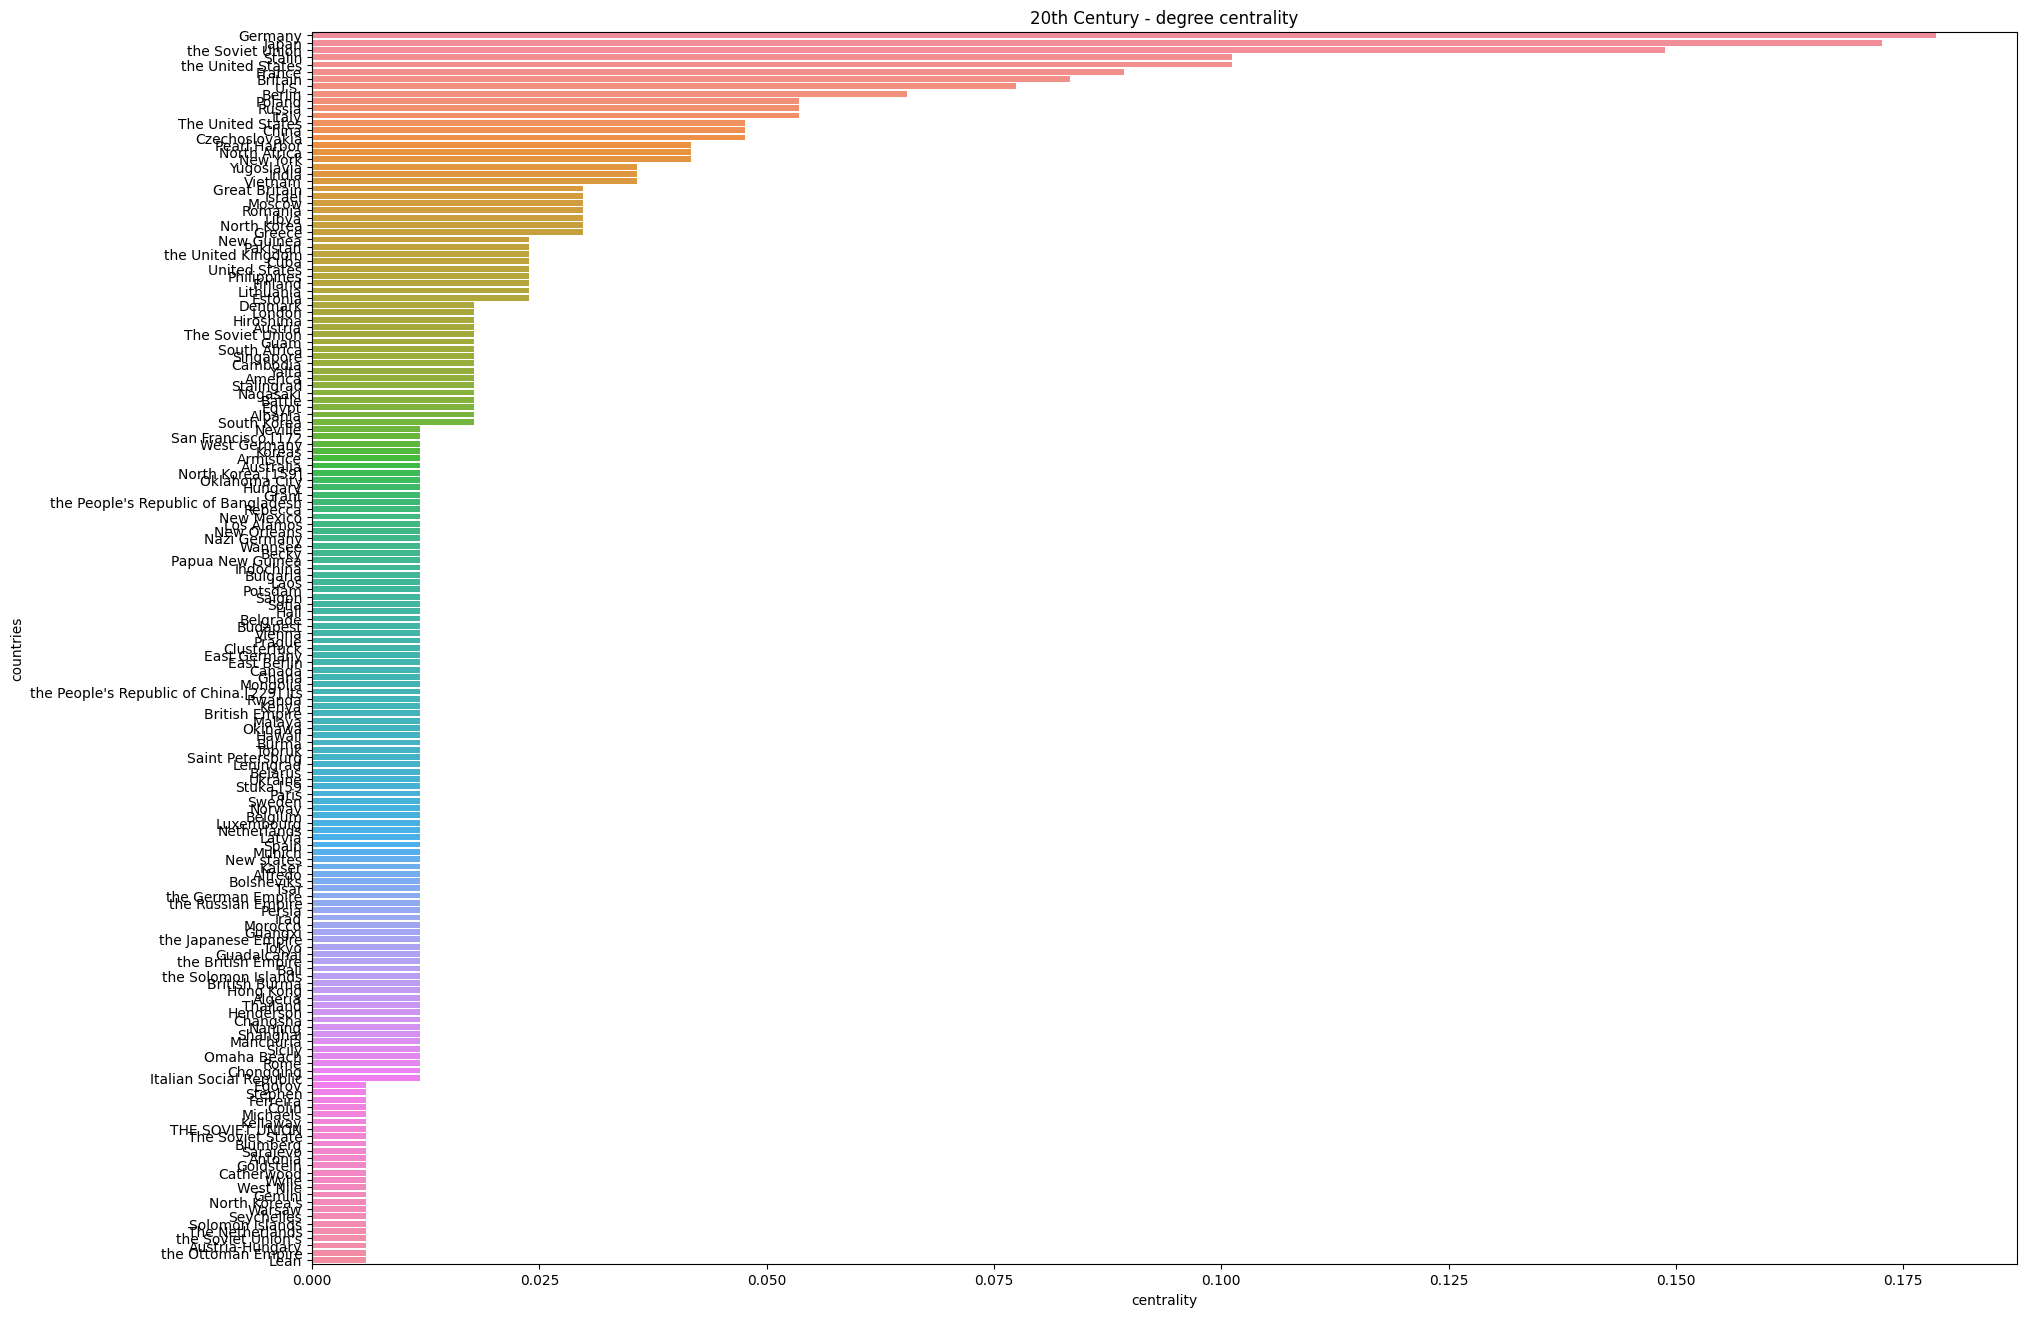

In [88]:
# Plot the degree centrality

plt.figure(figsize = (22, 16))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = degree_df).set_title("20th Century - degree centrality")

In [93]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['countries','centrality'])

In [96]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

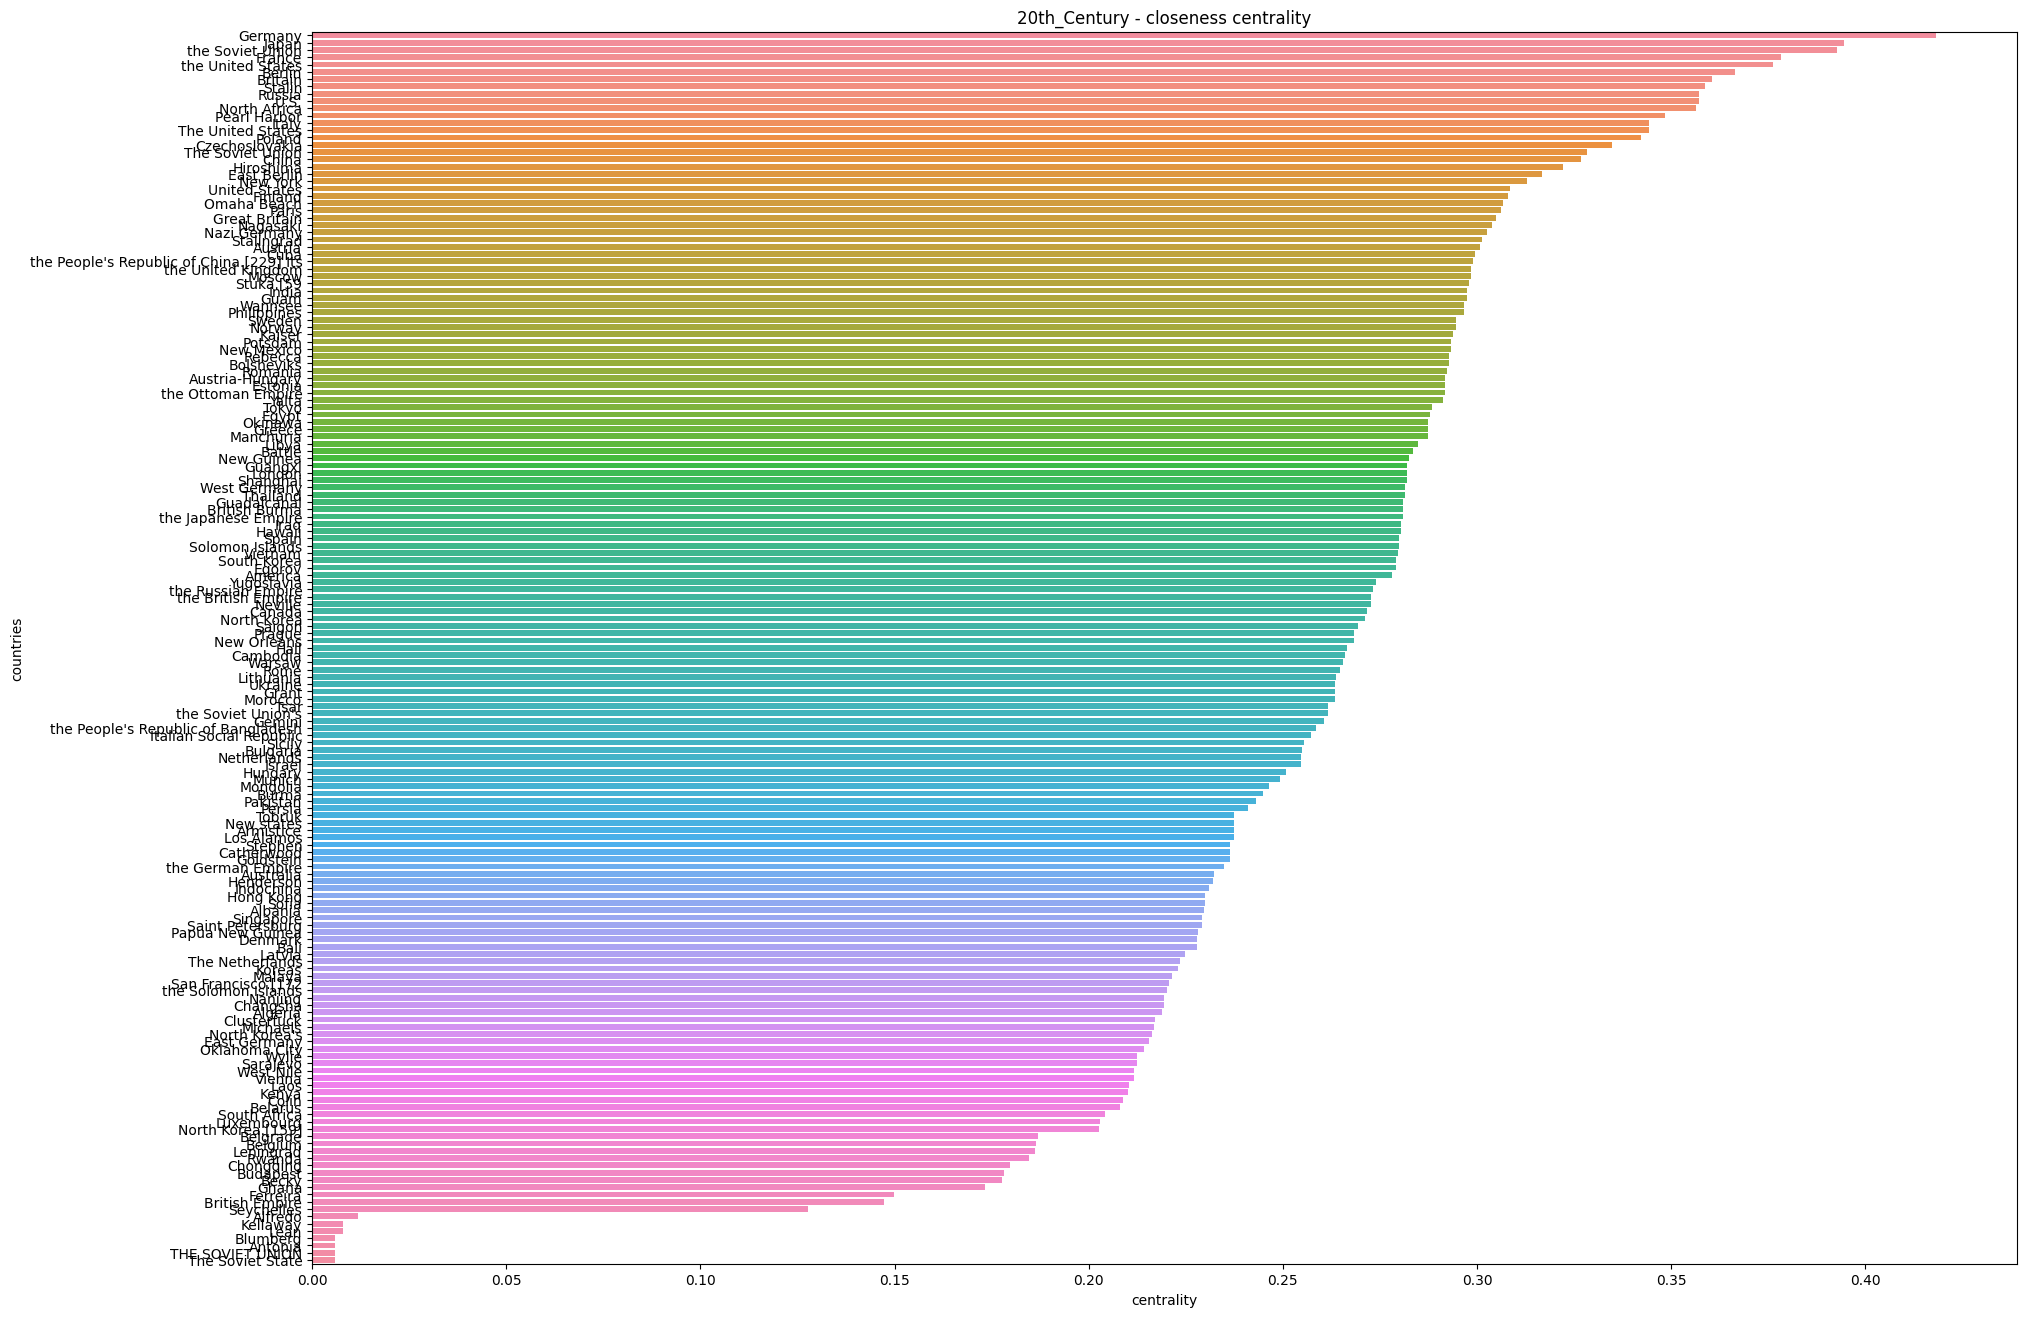

In [101]:
plt.figure(figsize = (22, 16))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = closeness_df).set_title("20th_Century - closeness centrality")

In [104]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['countries','centrality'])

In [107]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

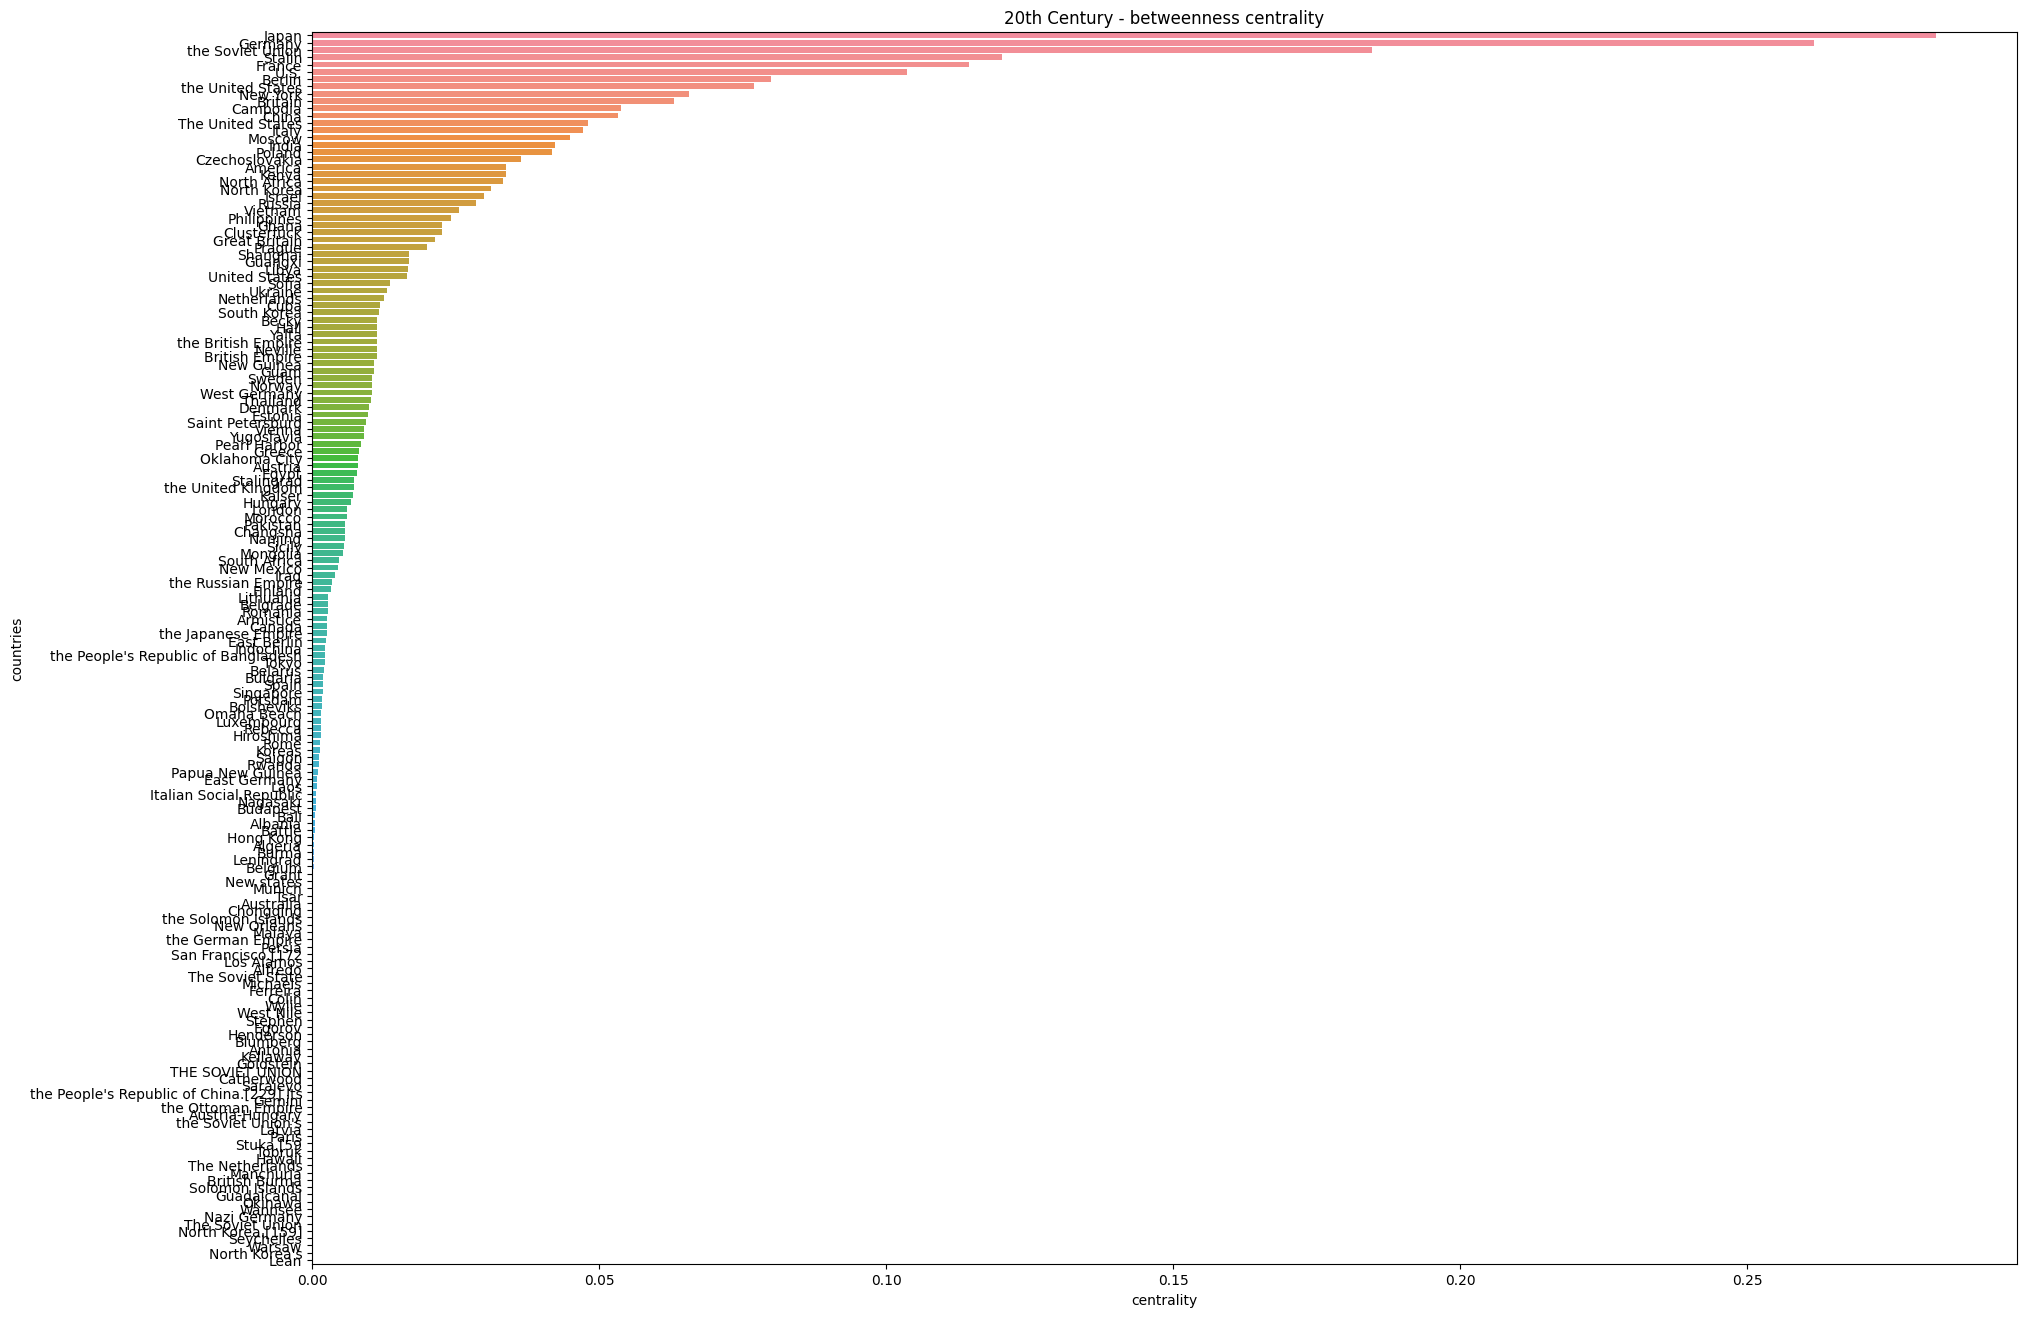

In [112]:
plt.figure(figsize = (22, 16))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "countries",
    saturation = 0.9, data = betweennes_df).set_title("20th Century - betweenness centrality")

In [115]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

**Degree Centrality Observations**

Nodes with high degree centrality include major geopolitical powers like Germany, the U.S., and the Soviet Union.

This indicates that these entities were directly involved with a large number of other nodes (countries, cities, or events).

It aligns with their central role in major 20th-century conflicts.

**Closeness Centrality Observations**

Countries like France, Britain, and Germany often have high closeness centrality.

These nodes are efficiently connected to others in the network, meaning information (or influence) can spread quickly from them.

This reflects the historical reality of these countries being political and military hubs.

**Betweenness Centrality Observations**

Germany and the Soviet Union score high, acting as bridges between different communities or clusters.

Their high betweenness suggests they were often on the path of historical events linking otherwise distant regions.

This aligns well with their pivotal role in both World Wars and the Cold War.